In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline
sess = tf.InteractiveSession()

## The famous Iris dataset

http://archive.ics.uci.edu/ml/datasets/Iris

In [26]:
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2016-11-18 16:06:38--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: 'iris.data.1'

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2016-11-18 16:06:39 (150 MB/s) - 'iris.data.1' saved [4551/4551]



In [2]:
iris = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

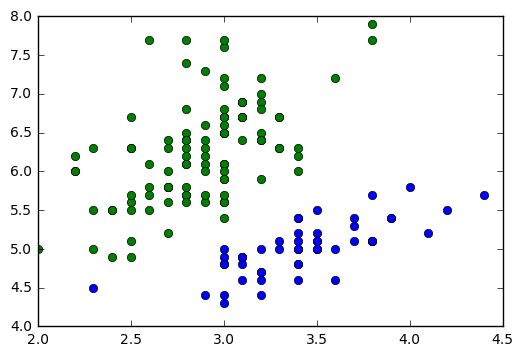

In [3]:
x_1 = iris.sepal_width.values
x_2 = iris.sepal_length.values

X = np.hstack([x_1, x_2])

# Iris-setosa versus the other species
targets = 1.0 * (iris.species.values == 'Iris-setosa')

plt.plot(x_1[targets == 1], x_2[targets == 1], 'ob', label='$y = 1$');
plt.plot(x_1[targets == 0], x_2[targets == 0], 'og', label='$y = 0$');

targets

# Exercise

Let's built a binary classifier recognizing Iris-setosa based on the sepals width and length.

 * Start with any of the high level wrappers from `sklearn` (Look at http://scikit-learn.org/stable/supervised_learning.html, you can try http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html but also give a go at a Naive Bayse approach, ...)

 * Plot the prediction of your model with 4 colours for the:
     * true positives $\{y = 1, \hat{y} = 1 \}$
     * false positives $\{y = 0, \hat{y} = 1 \}$
     * etc...
     
 * Adapt last week Tensorflow stochastic gradient procedure for the linear model (you now have $d = 3$, ie an additional weight)
 
 * Any intuition what's wrong with using a simple linear regression to predict our targets?
 
 * Adapt the example here to our dataset https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/logistic_regression.ipynb

In [4]:
Xt = tf.constant(X, name='Xt')

In [5]:
Yt = tf.constant(targets, name='Yt')

In [6]:
# Parameters

learning_rate = 0.01
training_epochs = 1000
display_step = 50
n_samples = X.shape[0]

In [7]:
# tf Graph Input
train_X1 = x_1
train_X2 = x_2
train_Y = targets
X1 = tf.placeholder("float")
X2 = tf.placeholder("float")
Y = tf.placeholder("float")
rng = np.random
# Set model weights
W1 = tf.Variable(rng.randn(), name="weight")
W2 = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
sess.run(W1.initializer)
sess.run(W2.initializer)
sess.run(b.initializer)

In [8]:
# Construct a linear model
pred = tf.add(tf.add(tf.mul(X1, W1), tf.mul(X2, W2)), b)
n_samples

300

In [9]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
init = tf.initialize_all_variables()

In [11]:
# Launch the graph
# Fit all training data
for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={X1: train_X1, X2: train_X2, Y: train_Y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X1: train_X1, X2: train_X2, Y: train_Y})
        print("Epoch: {:4d}, cost={:.9f} W1={} W2={} b={}".format(epoch+1, c, sess.run(W1), sess.run(W2), sess.run(b)))

Epoch:   50, cost=0.037278026 W1=0.9161279201507568 W2=-0.018303116783499718 b=-2.391429901123047
Epoch:  100, cost=0.036689177 W1=0.9288050532341003 W2=-0.026263108476996422 b=-2.383037567138672
Epoch:  150, cost=0.036175501 W1=0.9404006004333496 W2=-0.033639948815107346 b=-2.3747904300689697
Epoch:  200, cost=0.035725679 W1=0.950999915599823 W2=-0.04047991707921028 b=-2.3666768074035645
Epoch:  250, cost=0.035330132 W1=0.9606813788414001 W2=-0.04682497680187225 b=-2.3586883544921875
Epoch:  300, cost=0.034980699 W1=0.9695175886154175 W2=-0.05271422117948532 b=-2.3508150577545166
Epoch:  350, cost=0.034670494 W1=0.9775747656822205 W2=-0.05818314477801323 b=-2.3430495262145996
Epoch:  400, cost=0.034393638 W1=0.9849146008491516 W2=-0.063264861702919 b=-2.3353841304779053
Epoch:  450, cost=0.034145150 W1=0.9915934801101685 W2=-0.06798961758613586 b=-2.3278121948242188
Epoch:  500, cost=0.033920810 W1=0.9976640343666077 W2=-0.07238548249006271 b=-2.3203279972076416
Epoch:  550, cost=0.03

Optimization Finished!
Training cost= 0.032429 W1= 1.0338 W2= -0.103033 b= -2.24921 



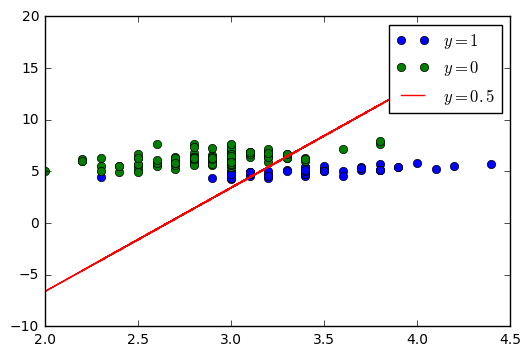

In [12]:
print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X1: train_X1, X2: train_X2, Y: train_Y})
print("Training cost=", training_cost, "W1=", sess.run(W1), "W2=", sess.run(W2), "b=", sess.run(b), '\n')

#Graphic display
plt.plot(x_1[targets == 1], x_2[targets == 1], 'ob', label='$y = 1$');
plt.plot(x_1[targets == 0], x_2[targets == 0], 'og', label='$y = 0$');

# res = (sess.run(W1) * train_X1 + sess.run(W2) * train_X2) + sess.run(b)
# res = (0.5 - b - x1 * w1) / w2
res = (0.5 - sess.run(b) - train_X1 * sess.run(W1)) / sess.run(W2)
plt.plot(x_1, res, 'r', label='$y = 0.5$');

plt.legend()
plt.show()

# Binary classification with the logistic regression

For $n$ samples $(x_i, y_i)_{i=1,\ldots, n}$ :

$$ P[y_i = 1] = \sigma(\mathbf{X}_i \mathbf{w} ) $$ 

with $\sigma$ the sigmoid or logistic function:

$$ \sigma(x) = \frac{1}{1 + e^{x}} $$ 

In [15]:
# tf Graph Input
train_X1 = x_1
train_X2 = x_2
train_Y = targets
X1 = tf.placeholder("float")
X2 = tf.placeholder("float")
Y = tf.placeholder("float")
rng = np.random
# Set model weights
W1 = tf.Variable(rng.randn(), name="weight")
W2 = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
sess.run(W1.initializer)
sess.run(W2.initializer)
sess.run(b.initializer)

In [14]:
# Construct a linear model
logits = tf.add(tf.add(tf.mul(X1, W1), tf.mul(X2, W2)), b)
y_preds = tf.sigmoid(logits)
n_samples

300

In [17]:
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

In [18]:
# Mean squared error
# cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# logistic loss

#sample_cost = -Y * tf.log(y_preds)
#cost = tf.reduce_mean(sample_cost)

cost = logloss(Y, y_preds)

# Gradient descent
learning_rate = 0.00000001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use the logical TensorFlow ops to test the value of a tensor.

In [167]:
init = tf.initialize_all_variables()

In [168]:
# Launch the graph
# Fit all training data
for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={X1: train_X1, X2: train_X2, Y: train_Y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X1: train_X1, X2: train_X2, Y: train_Y})
        print("Epoch: {:4d}, cost={:.9f} W1={} W2={} b={}".format(epoch+1, c, sess.run(W1), sess.run(W2), sess.run(b)))

Epoch:   50, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  100, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  150, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  200, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  250, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  300, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  350, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  400, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  450, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  500, cost=0.001323621 W1=-0.29390406608581543 W2=1.2947120666503906 b=0.12006556987762451
Epoch:  550, cost=0.

Optimization Finished!
Training cost= 0.00132362 W1= -0.293904 W2= 1.29471 b= 0.120066 



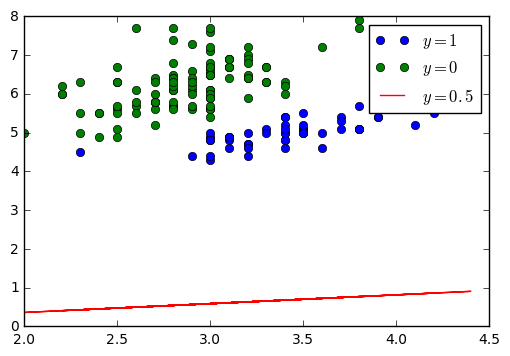

In [169]:
print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X1: train_X1, X2: train_X2, Y: train_Y})
print("Training cost=", training_cost, "W1=", sess.run(W1), "W2=", sess.run(W2), "b=", sess.run(b), '\n')

#Graphic display
plt.plot(x_1[targets == 1], x_2[targets == 1], 'ob', label='$y = 1$');
plt.plot(x_1[targets == 0], x_2[targets == 0], 'og', label='$y = 0$');

# x1*w1 + x2*w2 + b = 0.5
# sig(x1*w1 + x2*w2 + b) = 0.5
# x1*w1 + x2*w2 + b = inv(0.5)
# res = (sess.run(W1) * train_X1 + sess.run(W2) * train_X2) + sess.run(b)
# res = (0.5 - b - x1 * w1) / w2
res = (-sess.run(b) - train_X1 * sess.run(W1)) / sess.run(W2)
plt.plot(x_1, res, 'r', label='$y = 0.5$');

plt.legend()
plt.show()

In [161]:
sess.run(y_preds, feed_dict={X1: train_X1, X2: train_X2, Y: train_Y} )

array([ 0.99664658,  0.99625081,  0.99485576,  0.99431735,  0.99607158,
        0.99744022,  0.99379683,  0.99629492,  0.99306679,  0.99613935,
        0.99758601,  0.99520516,  0.99573475,  0.99188274,  0.99842799,
        0.99798822,  0.99744022,  0.99664658,  0.99831295,  0.99633873,
        0.99778926,  0.9964444 ,  0.9934237 ,  0.9968375 ,  0.99520516,
        0.99670452,  0.99629492,  0.99705267,  0.99713778,  0.99485576,
        0.99560803,  0.99778926,  0.99648631,  0.99754351,  0.99613935,
        0.99650574,  0.99799937,  0.99613935,  0.99286145,  0.9967435 ,
        0.99618489,  0.99488419,  0.99243259,  0.99618489,  0.99633873,
        0.99573475,  0.99633873,  0.99414885,  0.99725324,  0.99640191,
        0.99973685,  0.99942797,  0.99970919,  0.99859315,  0.99955314,
        0.99874204,  0.99932957,  0.9968549 ,  0.9995957 ,  0.9976688 ,
        0.99754167,  0.99897003,  0.99928445,  0.99922776,  0.9985258 ,
        0.99962318,  0.99848181,  0.99892658,  0.99944764,  0.99